In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score, mean_absolute_error
import numpy as np

In [2]:
!pip install xgboost

# Dataset Reading

In [3]:
df = pd.read_csv('No_Null_cleaned_10_Years_data_只本.csv')
#dfu = pd.read_csv('/content/admission_data_cleaned.csv')

In [4]:
df.head()

,INSTNM,PREDDEG,SATVR25,SATVR75,SATMT25,SATMT75,ACTCM25,ACTCM75,MD_EARN_WNE_P10,STUFACR,...,IRPS_BLACK,IRPS_HISP,IRPS_ASIAN,IRPS_AIAN,IRPS_NHPI,IRPS_2MOR,IRPS_NRA,IRPS_UNKN,PCTPELL,OPEFLAG
0,Abilene Christian University,3,510.0,620.0,500.0,600.0,21.0,27.0,50340.176833,13.0,...,0.0469,0.0433,0.0108,0.0036,0.0,0.0144,0.0108,0.0036,0.2550,1
1,Abilene Christian University,3,460.0,580.0,470.0,580.0,21.0,27.0,50340.176833,14.0,...,0.0346,0.0385,0.0115,0.0038,0.0,0.0346,0.0000,0.0000,0.2580,1
2,Abilene Christian University,3,470.0,590.0,480.0,590.0,22.0,27.0,50340.176833,15.0,...,0.0269,0.0423,0.0154,0.0038,0.0,0.0154,0.0038,0.0000,0.2630,1
3,Abilene Christian University,3,530.0,620.0,510.0,610.0,21.0,27.0,49294.000000,15.0,...,0.0435,0.0399,0.0109,0.0036,0.0,0.0145,0.0072,0.0000,0.2698,1
4,Abilene Christian University,3,470.0,580.0,490.0,600.0,21.0,27.0,41400.000000,14.0,...,0.0276,0.0315,0.0118,0.0039,0.0,0.0197,0.0039,0.0039,0.2347,1


In [5]:
#Check the number of rows and columns
rows, columns = df.shape
print('# of rows: {0} and # of columns: {1}'.format(rows,columns))

# of rows: 9197 and # of columns: 30


# Use University as the Label

In [6]:
df = df.drop(columns=['INSTNM'])

X = df.drop('MD_EARN_WNE_P10', axis=1)  # Predictor variables
y = df['MD_EARN_WNE_P10']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:

# num_classes = df['INSTNM'].nunique()
# print("Number of classes:", num_classes)

In [8]:
# from sklearn.preprocessing import LabelEncoder

# # Initialize the label encoder
# encoder = LabelEncoder()
# encoder2 = LabelEncoder()

# # Fit the encoder to the target variable and transform it to integer labels
# encoded_y = encoder.fit_transform(dfu['univName'])

# dfu['ugCollege'] = encoder2.fit_transform(dfu['ugCollege'])

# # The number of classes can also be obtained from the encoder
# num_classes = len(encoder.classes_)
# print("Number of classes:", num_classes)
# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, encoded_y, test_size=0.3, random_state=42)


In [9]:
# X_train = pd.get_dummies(X_train, columns=['ugCollege'])
# X_test = pd.get_dummies(X_test, columns=['ugCollege'])


# 1. Implement XGBoost as one of the baseline, treat as a Regression Problem

## Without cluster the universities

In [10]:
import xgboost as xgb

# Initialize the classifier
regressor = xgb.XGBRegressor(random_state=42)
#clf = xgb.XGBClassifier(objective='multi:softmax', num_class=num_classes, enable_categorical=True)
# Fit the classifier to the training data
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# # Calculate the accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)


In [11]:
# Make predictions with the test data
y_pred = regressor.predict(X_test)

# Calculate the MSE
mse = mean_squared_error(y_test, y_pred)
print("MSE: %.2f" % mse)

# Calculate the RMSE
rmse = np.sqrt(mse)
print("RMSE: %.2f" % rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE: %.2f" % mae)

r2 = r2_score(y_test, y_pred)
print("R2: %.2f" % r2)

MSE: 66754137.74
RMSE: 8170.32
MAE: 5344.18
R2: 0.20


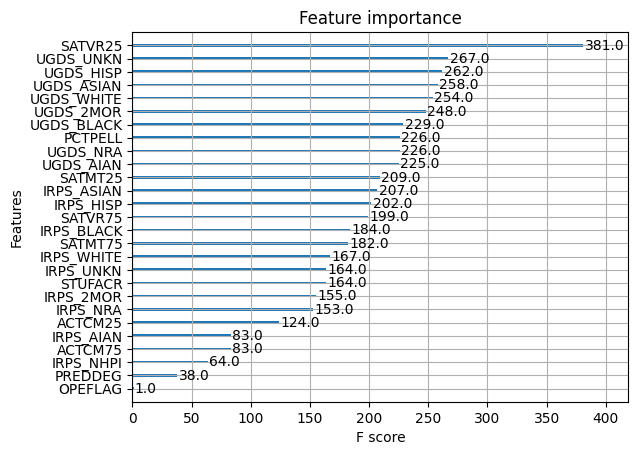

In [12]:
xgb.plot_importance(regressor)
plt.show()

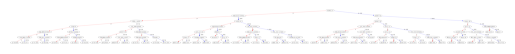

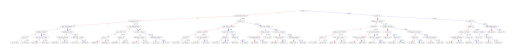

In [13]:
# Plot the first tree
xgb.plot_tree(regressor, num_trees=0)
plt.show()

# Plot the second tree
xgb.plot_tree(regressor, num_trees=1)
plt.show()

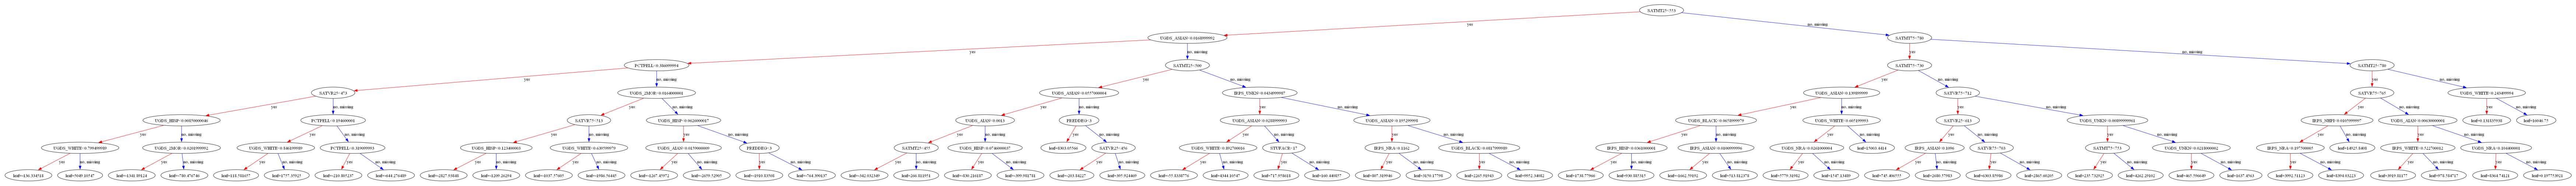

In [14]:
fig, ax = plt.subplots(figsize=(90, 90))
xgb.plot_tree(regressor, num_trees=0, ax=ax, dpi=300)
plt.show()


# Simple MLP Model:
Follows https://github.com/chinmaysharmacs10/University_Recommender/blob/master/classifier_model.py

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset

class Regressor(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Regressor, self).__init__()
        self.layer1 = nn.Linear(input_dim, 400)
        self.layer2 = nn.Linear(400, 100)
        #self.layer2 = nn.Linear(400, 800)
        #self.layer3 = nn.Linear(800, 100)
        self.layer4 = nn.Linear(100, output_dim)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        #x = self.relu(self.layer3(x))
        x = self.layer4(x)  # No activation, softmax will be applied in the loss
        return x


X_train_pt = torch.tensor(X_train.values, dtype=torch.float)
Y_train_pt = torch.tensor(y_train.values, dtype=torch.float)
X_test_pt = torch.tensor(X_test.values, dtype=torch.float)
Y_test_pt = torch.tensor(y_test.values, dtype=torch.float)

In [16]:
print(Y_train_pt.shape)

torch.Size([6437])


In [17]:
# Initialize the model, loss, and optimizer
model = Regressor(X_train_pt.shape[1], 1) # output_dim = 1 for regression problem
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# # DataLoader
# train_data = TensorDataset(X_train_pt, Y_train_pt.argmax(1))
# train_loader = DataLoader(dataset=train_data, batch_size=20, shuffle=True)

# # Training loop
# model.train()
for epoch in range(400):  # Number of epochs
    model.train()
    optimizer.zero_grad()  # Clear gradients
    outputs = model(X_train_pt)  # Forward pass
    loss = criterion(outputs, Y_train_pt)  # Compute loss
    loss.backward()  # Backpropagation
    optimizer.step()  # Update parameters

    if (epoch+1) % 50 == 0:  # Print loss every 50 epochs
        print(f'Epoch [{epoch+1}/200], Loss: {loss.item():.4f}')

        model.eval()  # Set the model to evaluation mode
        with torch.no_grad():  # No gradient computation
            predictions = model(X_test_pt)
            r2 = r2_score(predictions, Y_test_pt)
            print("R2: %.2f" % r2)
        # Calculate other metrics as needed

c:\Python311\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([6437])) that is different to the input size (torch.Size([6437, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [50/200], Loss: 1934105600.0000
R2: -2004.27


c:\Python311\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([6437])) that is different to the input size (torch.Size([6437, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [100/200], Loss: 120078672.0000
R2: -1.15


c:\Python311\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([6437])) that is different to the input size (torch.Size([6437, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [150/200], Loss: 113727552.0000
R2: -0.93


c:\Python311\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([6437])) that is different to the input size (torch.Size([6437, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [200/200], Loss: 113308472.0000
R2: -0.87


c:\Python311\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([6437])) that is different to the input size (torch.Size([6437, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [250/200], Loss: 113182896.0000
R2: -0.87


c:\Python311\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([6437])) that is different to the input size (torch.Size([6437, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [300/200], Loss: 113043376.0000
R2: -0.88


c:\Python311\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([6437])) that is different to the input size (torch.Size([6437, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [350/200], Loss: 112889752.0000
R2: -0.88


c:\Python311\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([6437])) that is different to the input size (torch.Size([6437, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [400/200], Loss: 112697968.0000
R2: -0.89


In [18]:
model.eval()  # Set the model to evaluation mode
with torch.no_grad():  # No gradient computation
    predictions = model(X_test_pt)
    mse = criterion(predictions, Y_test_pt)
    print(f'MSE: {mse.item()}')
    # Calculate other metrics as needed
    # Calculate the MSE
    mse = mean_squared_error(predictions, Y_test_pt)
    print("MSE: %.2f" % mse)

    # Calculate the RMSE
    rmse = np.sqrt(mse)
    print("RMSE: %.2f" % rmse)

    mae = mean_absolute_error(predictions, Y_test_pt)
    print("MAE: %.2f" % mae)

    r2 = r2_score(predictions, Y_test_pt)
    print("R2: %.2f" % r2)

MSE: 123645808.0
MSE: 74868672.00
RMSE: 8652.67
MAE: 6210.13
R2: -0.89


c:\Python311\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([2760])) that is different to the input size (torch.Size([2760, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


# Feature Token Transformer:

https://www.kaggle.com/code/masatakasuzuki/ft-transformer-transformer-for-tabular-data

In [19]:
!pip install tabtransformertf
!pip install tensorflow-addons
from IPython.display import clear_output
clear_output()

In [20]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow_addons as tfa
from tabtransformertf.utils.preprocessing import df_to_dataset, build_categorical_prep
from tabtransformertf.models.fttransformer import FTTransformerEncoder, FTTransformer

c:\Python311\Lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
c:\Python311\Lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.12.0 and strictly below 2.15.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.15.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and 

In [21]:
df = pd.read_csv('No_Null_cleaned_10_Years_data_只本.csv')
df = df.drop(columns=['INSTNM'])


In [22]:
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

In [23]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features.remove('MD_EARN_WNE_P10')
print(numerical_features)
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(categorical_features)

Target_FEATURE = 'MD_EARN_WNE_P10'
print(Target_FEATURE)


['PREDDEG', 'SATVR25', 'SATVR75', 'SATMT25', 'SATMT75', 'ACTCM25', 'ACTCM75', 'STUFACR', 'UGDS_WHITE', 'UGDS_BLACK', 'UGDS_HISP', 'UGDS_ASIAN', 'UGDS_AIAN', 'UGDS_ASIAN.1', 'UGDS_2MOR', 'UGDS_NRA', 'UGDS_UNKN', 'IRPS_WHITE', 'IRPS_BLACK', 'IRPS_HISP', 'IRPS_ASIAN', 'IRPS_AIAN', 'IRPS_NHPI', 'IRPS_2MOR', 'IRPS_NRA', 'IRPS_UNKN', 'PCTPELL', 'OPEFLAG']
[]
MD_EARN_WNE_P10


In [24]:
sc = StandardScaler()
sc.fit_transform(train_data[numerical_features])

train_data[numerical_features] = sc.transform(train_data[numerical_features])
test_data[numerical_features] = sc.transform(test_data[numerical_features])

In [25]:
print(test_data.keys())

Index(['PREDDEG', 'SATVR25', 'SATVR75', 'SATMT25', 'SATMT75', 'ACTCM25',
       'ACTCM75', 'MD_EARN_WNE_P10', 'STUFACR', 'UGDS_WHITE', 'UGDS_BLACK',
       'UGDS_HISP', 'UGDS_ASIAN', 'UGDS_AIAN', 'UGDS_ASIAN.1', 'UGDS_2MOR',
       'UGDS_NRA', 'UGDS_UNKN', 'IRPS_WHITE', 'IRPS_BLACK', 'IRPS_HISP',
       'IRPS_ASIAN', 'IRPS_AIAN', 'IRPS_NHPI', 'IRPS_2MOR', 'IRPS_NRA',
       'IRPS_UNKN', 'PCTPELL', 'OPEFLAG'],
      dtype='object')


In [26]:
train_data, val_data = train_test_split(train_data, test_size=0.2, shuffle=True, random_state=8)

In [27]:
def dataframe_to_dataset(data, target, shuffle=True, batch_size=32):
    """Converts a DataFrame to a TensorFlow dataset."""
    dataframe = data.copy()
    labels = dataframe.pop(target)
    df = {key: np.array(value)[:,tf.newaxis] for key, value in dataframe.items()}

    ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(dataframe))
    ds = ds.batch(batch_size)
    ds = ds.prefetch(batch_size)
    #ds = ds.batch(batch_size)
    return ds
#len(numerical_features + [Target_FEATURE])


Features = np.array(numerical_features + [Target_FEATURE])

train_dataset = dataframe_to_dataset(train_data, Target_FEATURE, shuffle=True, batch_size=64)
print(train_dataset)
val_dataset = dataframe_to_dataset(val_data, Target_FEATURE, shuffle=True, batch_size=32)

<_PrefetchDataset element_spec=({'PREDDEG': TensorSpec(shape=(None, 1), dtype=tf.float64, name=None), 'SATVR25': TensorSpec(shape=(None, 1), dtype=tf.float64, name=None), 'SATVR75': TensorSpec(shape=(None, 1), dtype=tf.float64, name=None), 'SATMT25': TensorSpec(shape=(None, 1), dtype=tf.float64, name=None), 'SATMT75': TensorSpec(shape=(None, 1), dtype=tf.float64, name=None), 'ACTCM25': TensorSpec(shape=(None, 1), dtype=tf.float64, name=None), 'ACTCM75': TensorSpec(shape=(None, 1), dtype=tf.float64, name=None), 'STUFACR': TensorSpec(shape=(None, 1), dtype=tf.float64, name=None), 'UGDS_WHITE': TensorSpec(shape=(None, 1), dtype=tf.float64, name=None), 'UGDS_BLACK': TensorSpec(shape=(None, 1), dtype=tf.float64, name=None), 'UGDS_HISP': TensorSpec(shape=(None, 1), dtype=tf.float64, name=None), 'UGDS_ASIAN': TensorSpec(shape=(None, 1), dtype=tf.float64, name=None), 'UGDS_AIAN': TensorSpec(shape=(None, 1), dtype=tf.float64, name=None), 'UGDS_ASIAN.1': TensorSpec(shape=(None, 1), dtype=tf.floa

In [28]:
#category_prep_layers = build_categorical_prep(train_data, CATEGORICAL_FEATURES)

In [29]:
train_data[numerical_features].values.shape

(5885, 28)

In [30]:
ft_linear_encoder = FTTransformerEncoder(
    numerical_features=numerical_features,  # list of numeric features
    categorical_features=[],  # list of numeric features
    numerical_data=train_data[numerical_features].values,
    categorical_data=[],
    y = None,
    numerical_embedding_type='linear',
    embedding_dim=32,
    depth=3,
    heads=6,
    attn_dropout=0.3,
    ff_dropout=0.3,
    explainable=True
)

# Pass the encoder to the model
ft_model = FTTransformer(
    encoder=ft_linear_encoder,  # Encoder from above
    out_dim=1,  # Number of outputs in final layer
    out_activation='relu',  # Activation function for final layer
)

In [31]:
epochs = 1000
lr = 0.001
weight_decay = 0.0001
optimizer = tfa.optimizers.AdamW(
        learning_rate=lr, weight_decay=weight_decay
    )

ft_model.compile(
    optimizer = optimizer,
    loss = tf.keras.losses.MeanSquaredError(),
    metrics= [tf.keras.metrics.RootMeanSquaredError()],
)


early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", mode="min", patience=10)

history = ft_model.fit(
    train_dataset,
    epochs=epochs,
    validation_data=val_dataset,
    callbacks=[early_stopping]
)

Epoch 1/1000



92/92 [==============================] - 14s 73ms/step - loss: 5220467712.0000 - importances_loss: 2610671360.0000 - output_loss: 2609796096.0000 - importances_root_mean_squared_error: 51094.7305 - output_root_mean_squared_error: 51086.1641 - val_loss: 5220504576.0000 - val_importances_loss: 2611077120.0000 - val_output_loss: 2609426176.0000 - val_importances_root_mean_squared_error: 51098.7031 - val_output_root_mean_squared_error: 51082.5430
Epoch 2/1000
92/92 [==============================] - 5s 56ms/step - loss: 5218215936.0000 - importances_loss: 2610671360.0000 - output_loss: 2607544320.0000 - importances_root_mean_squared_error: 51094.7305 - output_root_mean_squared_error: 51064.1211 - val_loss: 5216940032.0000 - val_importances_loss: 2611077120.0000 - val_output_loss: 2605861632.0000 - val_importances_root_mean_squared_error: 51098.7031 - val_output_root_mean_squared_error: 51047.6406
Epoch 3/1000
92/92 [==============================] - 6s 60ms/step - loss: 521

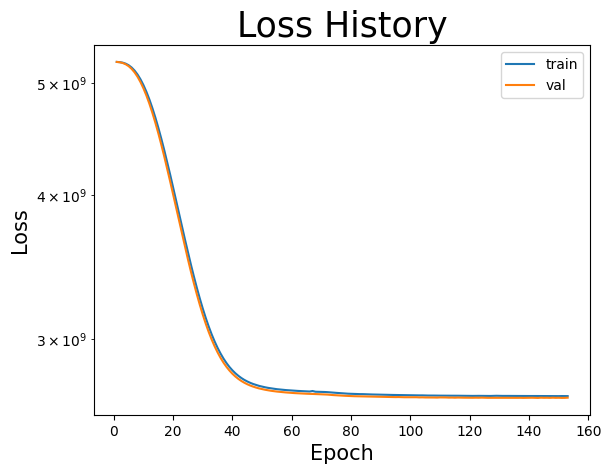

In [32]:
history = history.history

fontsize_title = 25
fontsize_axis = 15

plt.plot(range(1, len(history['loss'])+1), history['loss'], label='train')
plt.plot(range(1, len(history['val_loss'])+1), history['val_loss'], label='val')
plt.yscale('log')
plt.title('Loss History', fontsize=fontsize_title)
plt.xlabel('Epoch', fontsize=fontsize_axis)
plt.ylabel('Loss', fontsize=fontsize_axis)
plt.legend()
plt.show()

In [33]:
print(history.keys())

dict_keys(['loss', 'importances_loss', 'output_loss', 'importances_root_mean_squared_error', 'output_root_mean_squared_error', 'val_loss', 'val_importances_loss', 'val_output_loss', 'val_importances_root_mean_squared_error', 'val_output_root_mean_squared_error'])


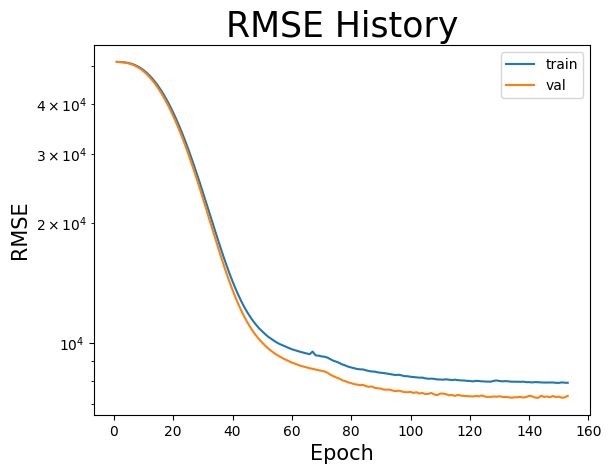

In [34]:
plt.plot(range(1, len(history['output_root_mean_squared_error'])+1), history['output_root_mean_squared_error'], label='train')
plt.plot(range(1, len(history['val_output_root_mean_squared_error'])+1), history['val_output_root_mean_squared_error'], label='val')
plt.yscale('log')
plt.title('RMSE History', fontsize=fontsize_title)
plt.xlabel('Epoch', fontsize=fontsize_axis)
plt.ylabel('RMSE', fontsize=fontsize_axis)
plt.legend()
plt.show()

In [35]:
#test_data = sc.transform(test_data)

test_dataset = dataframe_to_dataset(test_data, Target_FEATURE, batch_size=32)

y_pred = ft_model.predict(test_dataset)['output'].reshape(-1)

58/58 [==============================] - 1s 10ms/step


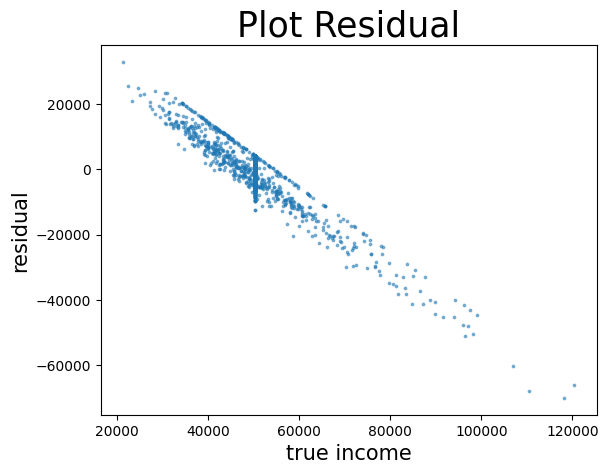

In [36]:
#y_pred = ft_model.predict(val_dataset)['output'].reshape(-1)
y_true = test_data[Target_FEATURE].values
residual = y_pred - y_true
plt.scatter(y_true, residual, s=3, alpha=0.5)
plt.title('Plot Residual', fontsize=fontsize_title)
plt.xlabel('true income', fontsize=fontsize_axis)
plt.ylabel('residual', fontsize=fontsize_axis)
plt.show()

In [37]:
print("R2: ", r2_score(y_true, y_pred))

R2:  -0.1837801625196971


# 2.  Implement Random Forest, XGboost and Simple MLP Neural Network + University Clustering

## Cluster the universities according to price.
## Basically , change regression into classification problem for easier computation.

In [38]:
data = pd.read_csv('No_Null_cleaned_10_Years_data_只本.csv')

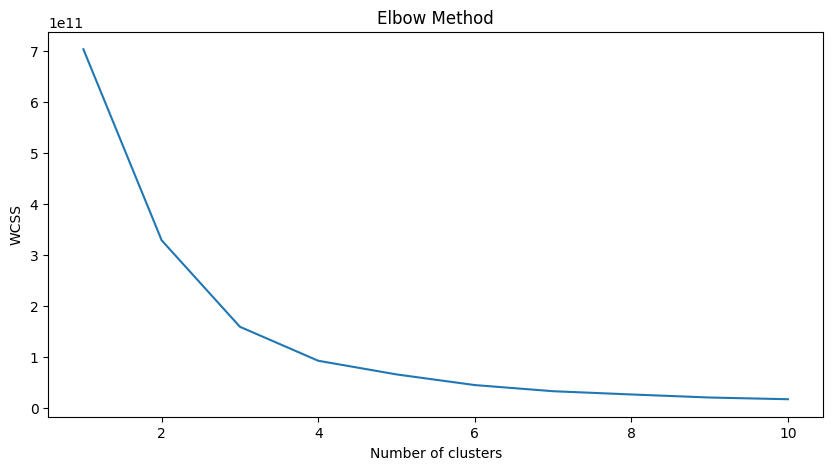

In [39]:
# Find the appropriate number of clusters to perform KNN clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Extract the 'MD_EARN_WNE_P10' column for clustering
earnings = data[['MD_EARN_WNE_P10']]

# Calculate WCSS for different numbers of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(earnings)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [40]:

# Choose 3 clusters based on the Elbow Method result
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
data['Earnings_Cluster'] = kmeans.fit_predict(earnings)

# Check the first few rows to confirm the clustering
data[['INSTNM', 'MD_EARN_WNE_P10', 'Earnings_Cluster']].head()


,INSTNM,MD_EARN_WNE_P10,Earnings_Cluster
0,Abilene Christian University,50340.176833,1
1,Abilene Christian University,50340.176833,1
2,Abilene Christian University,50340.176833,1
3,Abilene Christian University,49294.000000,1
4,Abilene Christian University,41400.000000,0


## Perform Random Forest

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Prepare the features and target variable
X = data.drop(['INSTNM', 'Earnings_Cluster'], axis=1)
y = data['Earnings_Cluster']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_results = classification_report(y_test, y_pred)

print("Random Forest")
print("accuracy: ", accuracy)
print("classification results: ", classification_report_results)

Random Forest
accuracy:  0.9994565217391305
classification results:                precision    recall  f1-score   support

           0       1.00      1.00      1.00       281
           1       1.00      1.00      1.00      1464
           2       1.00      0.99      0.99        95

    accuracy                           1.00      1840
   macro avg       1.00      1.00      1.00      1840
weighted avg       1.00      1.00      1.00      1840



In [42]:
import xgboost as xgb

# Initialize the classifier
clf = xgb.XGBClassifier(objective='multi:softmax', num_class=3, enable_categorical=True)
# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
classification_report_results = classification_report(y_test, y_pred)

print("XGBoost: ")
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_results)

XGBoost: 
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       281
           1       1.00      1.00      1.00      1464
           2       1.00      1.00      1.00        95

    accuracy                           1.00      1840
   macro avg       1.00      1.00      1.00      1840
weighted avg       1.00      1.00      1.00      1840



In [43]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the features (excluding the target variable and non-numeric columns)
X_scaled = scaler.fit_transform(X)

# Split the scaled data into training and test sets
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train_scaled.shape, X_test_scaled.shape


((7357, 29), (1840, 29))

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

import tensorflow as tf
from tensorflow import keras

# Convert labels to categorical since we're dealing with a classification problem
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(n_clusters, activation='softmax')  # Output layer for 3 clusters
])

# Compile the model
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])

# Train the model
history = model.fit(X_train_scaled, y_train_cat, epochs=200, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the model on the test set
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(X_test_scaled, y_test_cat, verbose=0)

test_accuracy, test_precision, test_recall


(0.9847826361656189, 0.9847826361656189, 0.9847826361656189)

In [45]:
print(model.evaluate(X_test_scaled, y_test_cat, verbose=0))

[0.09055627137422562, 0.9847826361656189, 0.9847826361656189, 0.9847826361656189]
